# Building Audio Sample Feature Datasets



In [1]:
import soundcloud
import urllib 
import urllib.request
import os
from pydub import AudioSegment
from pathlib import Path

import urllib.request

from urllib.parse import urlparse


# create client with access token
client = soundcloud.Client(client_id='705e16660421b1738d3cbd928efc78e6',
                           client_secret='8a9ab078e83290d5eb0c462a7492bb76')




In [2]:
tracks = client.get('/tracks', genres=['house'], license='cc-by-sa', filter="public")

tracks[0].title


'Gym Best Music For Workout vol 2'

In [5]:

def mkdirs_safe(path):
    try:
        os.makedirs(path) 
    except Exception:
        pass

mkdirs_safe('../data/processed/sc/')
mkdirs_safe('../data/raw/sc/')

list_of_wav_files = []

for track in tracks: 

    
    try:
        print('GETTING /tracks/%d [%s]'%(track.id,track.title))
        track = client.get('/tracks/%s'%track.id)
        track_loc = "../data/raw/sc/%s.mp3"%track.id
    
        stream_url=track.stream_url
        track_path = Path(track_loc)
    
        if not track_path.is_file():

            # get the tracks streaming URL
            stream_url = client.get(track.stream_url, allow_redirects=False)


            print("Loading sound %s"%(track_loc))
            urllib.request.urlretrieve(stream_url.location, track_loc)
            # print the tracks stream URL
            print(track_loc, " is created")
        else:
            print(track_loc, " already existed")

        wav_loc = "../data/processed/sc/%s.wav"%track.id
        wav_path = Path(wav_loc)

        if not wav_path.is_file():
            print("Processing mp3 to wav")
            sound = AudioSegment.from_mp3(track_loc)
            sound.export(wav_loc, format="wav")
            
            print("Processing completed")
        else:
            print("Wav already exists")
            
        list_of_wav_files.append(wav_loc)
    except Exception:
        print("Failed to load %s"%track.name)
        pass
    
   




GETTING /tracks/99287868 [Gym Best Music For Workout vol 2]
../data/raw/sc/99287868.mp3  already existed
Wav already exists
GETTING /tracks/18340792 [Tyrese f/R. Kelly & Tyga - I Gotta Chick That Love Me [Dirty]]
../data/raw/sc/18340792.mp3  already existed
Wav already exists
GETTING /tracks/194396577 [Worth It (feat. Kid Ink)]
../data/raw/sc/194396577.mp3  already existed
Wav already exists
GETTING /tracks/249625240 [Dreams]
../data/raw/sc/249625240.mp3  already existed
Wav already exists
GETTING /tracks/45840331 [Fall Out Boy - Dance Dance]
../data/raw/sc/45840331.mp3  already existed
Wav already exists
GETTING /tracks/48582011 [علاء عبدالخالق وأميرة : بحبك باستمرار ‎]
../data/raw/sc/48582011.mp3  already existed
Wav already exists
GETTING /tracks/89891406 [فيروز _ لا أنت حبيبي]
../data/raw/sc/89891406.mp3  already existed
Wav already exists
GETTING /tracks/62115405 [Los Rieleros Del Norte Mix DJ JSTYLEZ]
../data/raw/sc/62115405.mp3  already existed
Wav already exists
GETTING /tracks

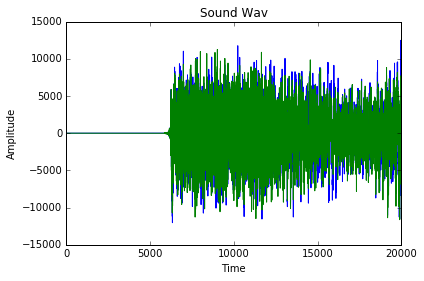

In [6]:
import wave
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
%matplotlib inline 

# read audio samples
input_data = read(list_of_wav_files[0])
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:20000])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sound Wav")
# display the plot
plt.show()

In [9]:

# We'll need numpy for some mathematical operations
import numpy as np


# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline


# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

/Users/kthakore/Documents/musigan/notebooks
Loading to LibROSA ../data/processed/sc/99287868.wav


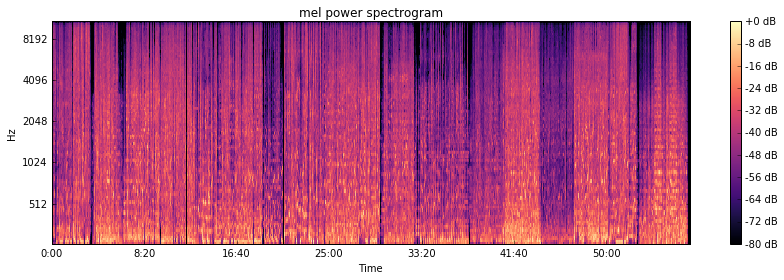

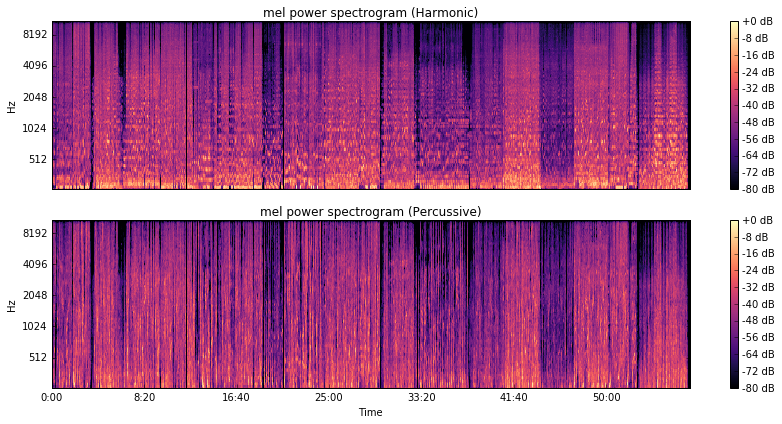

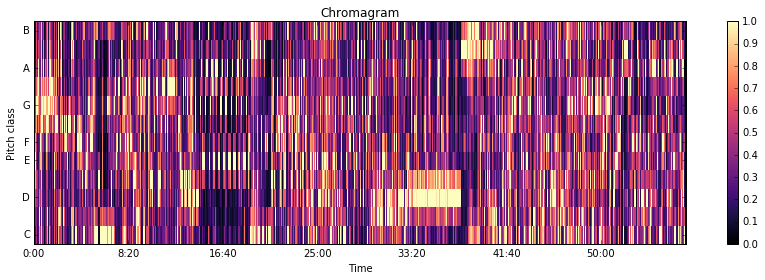

In [11]:

print("Loading to LibROSA %s"%list_of_wav_files[0])
y, sr = librosa.load(list_of_wav_files[0])

S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

log_S.shape

y_harmonic, y_percussive = librosa.effects.hpss(y)
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.logamplitude(S_harmonic, ref_power=np.max)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()


Estimated tempo:        172.27 BPM
First 5 beat frames:    [ 7 25 41 56 70]
First 5 beat times:     [ 0.16253968  0.58049887  0.95201814  1.30031746  1.62539683]


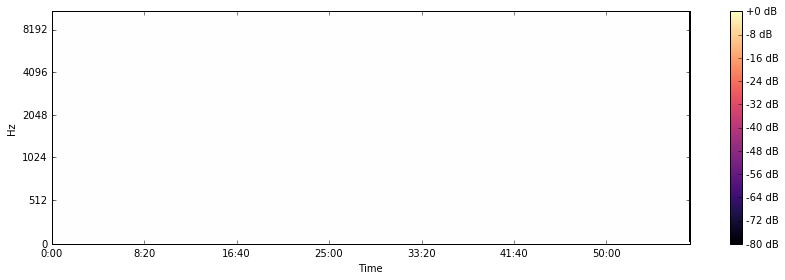

In [12]:

# Now, let's run the beat tracker.
# We'll use the percussive component for this part
plt.figure(figsize=(12, 6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

# Let's re-draw the spectrogram, but this time, overlay the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()


print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))

In [14]:
y, sr = librosa.load('data/processed/rand_sample.wav')
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kthakore/Documents/musigan/notebooks/data/processed/rand_sample.wav'

Estimated tempo:        172.27 BPM
First 5 beat frames:    [ 7 25 41 56 70]
First 5 beat times:     [ 0.16253968  0.58049887  0.95201814  1.30031746  1.62539683]
Estimated tempo:        172.27 BPM
First 5 beat frames:    [ 7 25 41 56 70]
First 5 beat times:     [ 0.16253968  0.58049887  0.95201814  1.30031746  1.62539683]


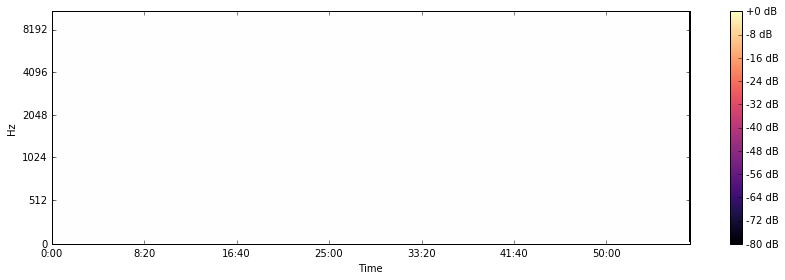

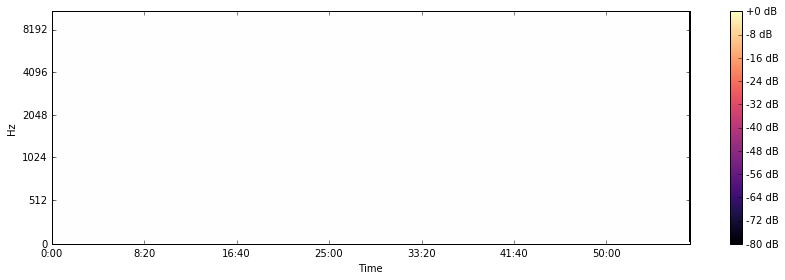

In [13]:

# Now, let's run the beat tracker.
# We'll use the percussive component for this part
plt.figure(figsize=(12, 6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

# Let's re-draw the spectrogram, but this time, overlay the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()


print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))
# Now, let's run the beat tracker.
# We'll use the percussive component for this part
plt.figure(figsize=(12, 6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

# Let's re-draw the spectrogram, but this time, overlay the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()


print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))